In [1]:
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
metadata_rambam = pd.read_csv('D:\\lung sounds\\rambam\\labels.csv')
metadata_kaggle = pd.read_csv('D:\\lung sounds\\kaggle\\labels.csv')
metadata_kauh = pd.read_csv('D:\\lung sounds\\kauh\\labels.csv')

In [17]:
metadata_rambam.columns

Index(['id', 'name', 'taz', 'age', 'gender', 'weight', 'height', 'label'], dtype='object')

In [18]:
metadata_kaggle.columns

Index(['ID', 'age', 'sex', 'bmi', 'label'], dtype='object')

In [19]:
metadata_kauh.columns

Index(['ID', 'age', 'label', 'sex'], dtype='object')

In [28]:
colors = ['b', 'r', 'y', 'g', 'm', 'c']

# Metadata distribution figure

In [76]:
def violin_plot_one_ax(ax, data_to_plot, xticklabels):
    violin_parts = ax.violinplot(data_to_plot)
    for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(colors[i])
    ax.set_xticks(1+np.arange(len(xticklabels)))
    ax.set_xticklabels(xticklabels)

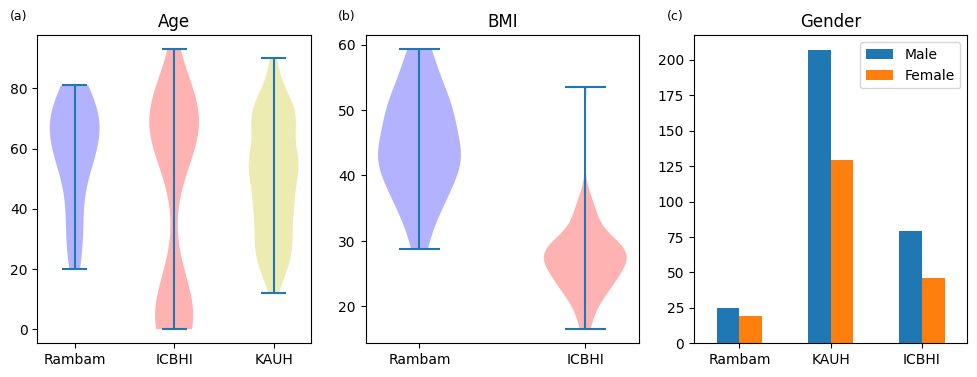

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
x_pos, y_pos = -0.1, 1.05
letter_fontsize = 9

violin_plot_one_ax(axes[0], [metadata_rambam.age, metadata_kaggle.age.dropna().astype('int64'), metadata_kauh.age],
                  xticklabels=['Rambam', 'ICBHI', 'KAUH'])

violin_plot_one_ax(axes[1], [(metadata_rambam.weight / (metadata_rambam.height / 100)).dropna(), metadata_kaggle.bmi.dropna()],
                  xticklabels=['Rambam', 'ICBHI'])

index = ['Rambam', 'KAUH', 'ICBHI']
male = [list(metadata_rambam.gender.values).count('M'), list(metadata_kauh.sex.values).count('M'), 
        list(metadata_kaggle.sex.values).count('M')]
female = [list(metadata_rambam.gender.values).count('F'), list(metadata_kauh.sex.values).count('F'), 
        list(metadata_kaggle.sex.values).count('F')]

df = pd.DataFrame({
    'Male': male,
    'Female': female,
}, index=index)
df.plot.bar(rot=0, ax=axes[2])

axes[0].text(x_pos, y_pos, "(a)", fontsize=letter_fontsize, transform=axes[0].transAxes)
axes[1].text(x_pos, y_pos, "(b)", fontsize=letter_fontsize, transform=axes[1].transAxes)
axes[2].text(x_pos, y_pos, "(c)", fontsize=letter_fontsize, transform=axes[2].transAxes)

axes[0].title.set_text('Age')
axes[1].title.set_text('BMI')
axes[2].title.set_text('Gender')

fig.savefig('C:\\Users\\JEREMYL\\OneDrive - Technion (1)\\MSc\\Research\\Lung sounds\\figures\\metadata_distribution')